In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('F:\Data_Science\ProductSense-ABTesing\DS take home challenges\Dataset')

In [3]:
raw_data = pd.read_csv('employee_retention.csv')
raw_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


# Basic Info

In [4]:
raw_data.shape

(24702, 7)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


Department is string, join_date, quit_date should be converted to date format

In [6]:
print('There are 13510 people who quit and ' + 
      str(24702-13510) +
     ' people who didn\'t quit by 2015.')

There are 13510 people who quit and 11192 people who didn't quit by 2015.


In [7]:
raw_data.describe(include='all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03,2015-05-08
freq,NaN,NaN,9180,NaN,NaN,105,111
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN
50%,500793.000000,2.000000,NaN,14.000000,123000.000000,NaN,NaN
75%,753137.250000,5.000000,NaN,21.000000,187000.000000,NaN,NaN


There seem to be outliers in 'seniority' and 'salary'

**Seniority**

In [8]:
raw_data[raw_data['seniority'] > 21].sort_values(by = 'seniority', ascending = False)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09
8436,193109.0,2,data_science,29,275000.0,2014-03-17,NaN
2100,639047.0,2,customer_service,29,123000.0,2015-05-12,NaN
15613,30208.0,6,engineer,29,206000.0,2013-12-16,NaN
...,...,...,...,...,...,...,...
7018,330049.0,2,data_science,22,336000.0,2011-03-21,2013-10-11
19115,285351.0,2,customer_service,22,126000.0,2015-10-12,NaN
13579,130527.0,2,customer_service,22,111000.0,2012-09-04,NaN
19100,121134.0,1,data_science,22,288000.0,2015-05-04,NaN


98 and 99 seem impossible, consider removing them

In [9]:
data = raw_data[raw_data['seniority'] < 98]
data.shape

(24700, 7)

**Salary**

In [10]:
data[data['salary'] > 200000].sort_values(by = 'salary', ascending = False)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
10689,62540.0,2,engineer,23,408000.0,2013-08-26,NaN
7919,517439.0,2,engineer,25,406000.0,2013-09-16,NaN
3172,965750.0,1,data_science,19,398000.0,2015-05-04,NaN
4150,707585.0,1,engineer,22,393000.0,2013-09-16,NaN
6638,460908.0,1,engineer,24,386000.0,2014-11-03,NaN
...,...,...,...,...,...,...,...
10519,988191.0,7,sales,21,201000.0,2012-01-30,2015-11-27
4261,651644.0,1,engineer,11,201000.0,2014-09-02,2015-10-09
6820,919576.0,1,design,22,201000.0,2013-05-28,2015-06-05
15487,398409.0,2,sales,19,201000.0,2013-12-09,2015-06-12


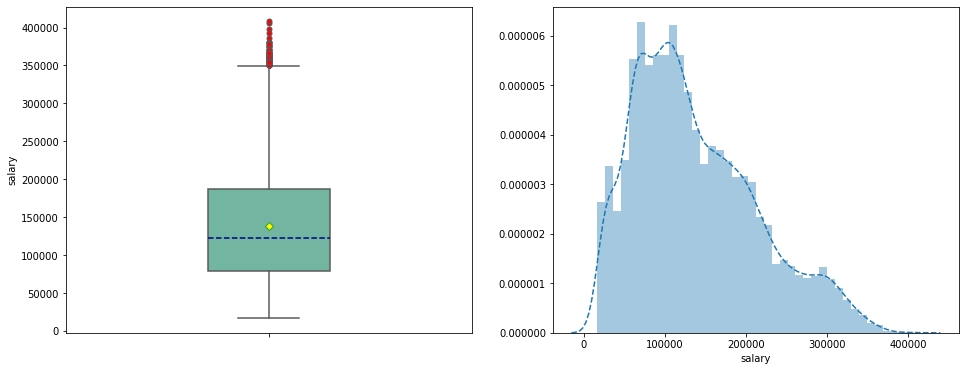

In [11]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.boxplot(data['salary'], orient='v', width=0.3, showmeans = True, palette='Set2',
           medianprops = {'color': 'navy', 'linestyle': '--'},
           meanprops = {'markerfacecolor': 'yellow', 'marker': 'D'},
           flierprops = {'markerfacecolor': 'red', 'marker': 'o', 'markersize': 5}
           )
plt.subplot(122)
sns.distplot(data['salary'], bins=40, norm_hist=True,
             kde=True, kde_kws={'linestyle': '--'})
plt.show()

The salary is skewed.

**Convert date-related column from string to datetime**

In [12]:
from datetime import datetime

In [13]:
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])
data.head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 7 columns):
employee_id    24700 non-null float64
company_id     24700 non-null int64
dept           24700 non-null object
seniority      24700 non-null int64
salary         24700 non-null float64
join_date      24700 non-null datetime64[ns]
quit_date      13508 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.5+ MB


# Estimate employee headcount for each company

In [15]:
'''
Create 3 lists to store unique(join_date), headcount and company_id
for each company and each day:
    filter the data which has an earlier join_date and quit_date respectively
    headcount = len(join_date) - len(quit_date)
    append the 3 lists
Create a DataFrame with the 3 lists    
'''
day = []
headcount = []
company_id = []

unique_day = np.sort(pd.unique(data['join_date']))
company = np.sort(pd.unique(data['company_id']))

for company_idx in company:
    for day_idx in unique_day:
        date_temp = data[data['company_id'] == company_idx]
        joinNum = len(date_temp[date_temp['join_date'] <= day_idx])
        quitNum = len(date_temp[date_temp['quit_date'] <= day_idx])
        
        day.append(day_idx)
        headcount.append(joinNum - quitNum)
        company_id.append(company_idx)

pd.DataFrame({'day': day, "headcount": headcount, 'company_id': company_id}).sort_values(['day','company_id'])

,day,headcount,company_id
0,2011-01-24,25,1
995,2011-01-24,17,2
1990,2011-01-24,9,3
2985,2011-01-24,12,4
3980,2011-01-24,5,5
...,...,...,...
7959,2015-12-10,468,8
8954,2015-12-10,432,9
9949,2015-12-10,385,10
10944,2015-12-10,4,11


In [16]:
# one specific case of company1 to help write the loop
date = np.sort(pd.unique(data['join_date']))
for i in date:
    date_temp = data[data['company_id'] == 1]
    joinNum = (len(date_temp[date_temp['join_date'] <= i]))
    quitNum = (len(date_temp[date_temp['quit_date'] <= i]))
    print(joinNum - quitNum)

25
27
29
59
66
67
67
99
102
104
104
129
130
132
156
159
159
178
178
181
182
210
210
211
212
231
234
236
237
268
270
272
272
301
305
305
305
333
337
340
340
372
373
373
375
402
405
405
406
435
438
442
444
469
472
472
475
508
509
514
515
546
547
551
552
584
585
585
586
617
620
620
648
653
657
658
687
689
690
690
719
723
724
726
748
753
754
756
780
781
782
807
809
811
812
812
843
847
849
851
872
876
876
876
913
916
918
919
950
954
956
957
991
991
994
994
1022
1026
1029
1029
1063
1065
1066
1066
1096
1096
1097
1124
1127
1128
1130
1163
1164
1166
1166
1191
1195
1196
1197
1225
1228
1229
1229
1265
1267
1268
1269
1298
1303
1305
1305
1325
1328
1330
1330
1352
1357
1361
1362
1396
1397
1398
1400
1425
1428
1429
1430
1448
1448
1450
1449
1493
1494
1495
1496
1516
1520
1521
1522
1541
1542
1545
1546
1571
1573
1574
1575
1594
1595
1596
1631
1633
1633
1653
1654
1656
1658
1684
1686
1687
1705
1708
1711
1713
1737
1743
1743
1744
1762
1767
1767
1768
1791
1794
1798
1798
1825
1827
1829
1843
1846
1847
1848
1863
1865

# employee churn

In [17]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [18]:
data.loc[data['quit_date'].isnull(), 'if_quit'] = 0     # quit_date is null --- not quit

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
data.loc[data['if_quit'].isnull(), 'if_quit'] = 1      # if_quit is null --- quit

In [20]:
data

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,if_quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1.0
...,...,...,...,...,...,...,...,...
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,1.0
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,1.0
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT,0.0
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaT,0.0


In [208]:
data['quit_date'].isnull().value_counts()

False    13508
True     11192
Name: quit_date, dtype: int64

In [21]:
data['if_quit'].value_counts()

1.0    13508
0.0    11192
Name: if_quit, dtype: int64

data is balanced

## Analyse the relationship between each feature and average quit rate

### Duration

When you see 'start_date' and 'end_date', think of 'duration'

In [55]:
data['work_days'] = (data['quit_date'] - data['join_date']) / np.timedelta64(1, 'D')
data.head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,if_quit,work_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1.0,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1.0,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0.0,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1.0,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1.0,1040.0


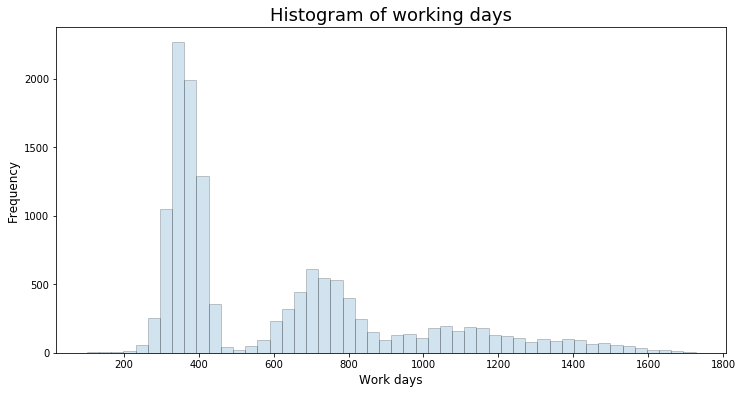

In [69]:
hist_kws = {'histtype': 'bar','edgecolor': 'black', 'alpha': 0.2}
plt.figure(figsize=(12,6))
sns.distplot(data['work_days'].dropna(), bins=50, hist_kws=hist_kws, kde=False)
plt.xlabel('Work days', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Histogram of working days', fontsize = 18)
plt.show()

There is a pattern. Most people who quit the job worked in the company for about a year. 

People might get bored in the same place for too long\
Very interesting, there are **peaks around each employee year anniversary**!


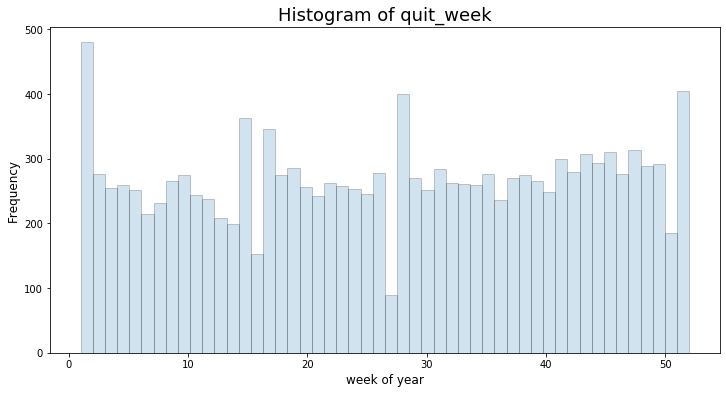

In [84]:
# Let's plot week of the year
quit_week = data['quit_date'].dropna().apply(lambda x: int(x.strftime('%V')))
# 需要对每列中的每个元素进行函数操作时，使用apply+lambda

hist_kws = {'histtype': 'bar','edgecolor': 'black', 'alpha': 0.2}
plt.figure(figsize=(12,6))
sns.distplot(quit_week, bins=50, hist_kws=hist_kws, kde=False)
plt.xlabel('week of year', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Histogram of quit_week', fontsize = 18)
plt.show()

It also **peaks around the new year**. Makes sense, companies have much more money to hire at the
beginning of the year.

The following are my analysis, not included in the provided answer

### compnay_id?

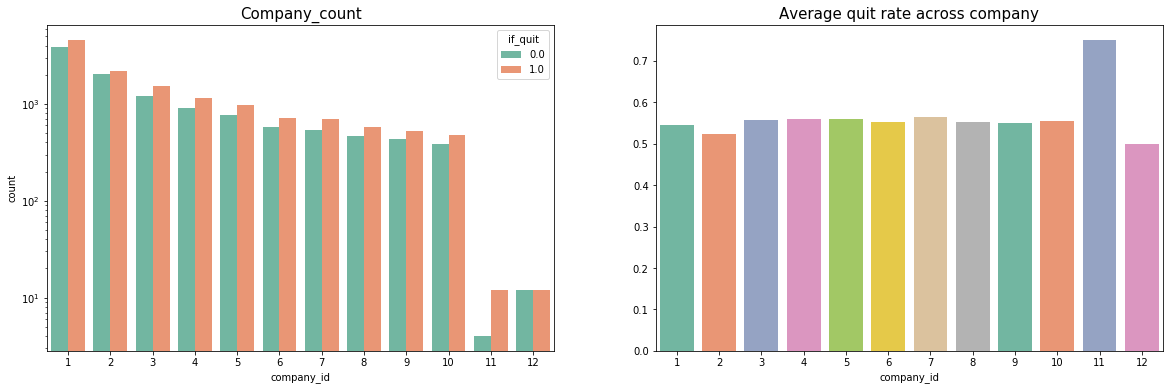

In [22]:
by_company = data.groupby('company_id')['if_quit'].mean()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.countplot(x = 'company_id', data = data, hue = 'if_quit', palette = 'Set2', ax = ax[0])
ax[0].set_title('Company_count', fontsize = 15)
ax[0].set_yscale('log')    
# total count of company 11 and 12 are smaller than other company, if not log y, they won't appear on the graph
sns.barplot(x = by_company.index, y = by_company.values, palette='Set2', ax = ax[1])
ax[1].set_title('Average quit rate across company', fontsize = 15)
plt.show()

The average quit rate in company 11 is much higher than that in other companies

### department

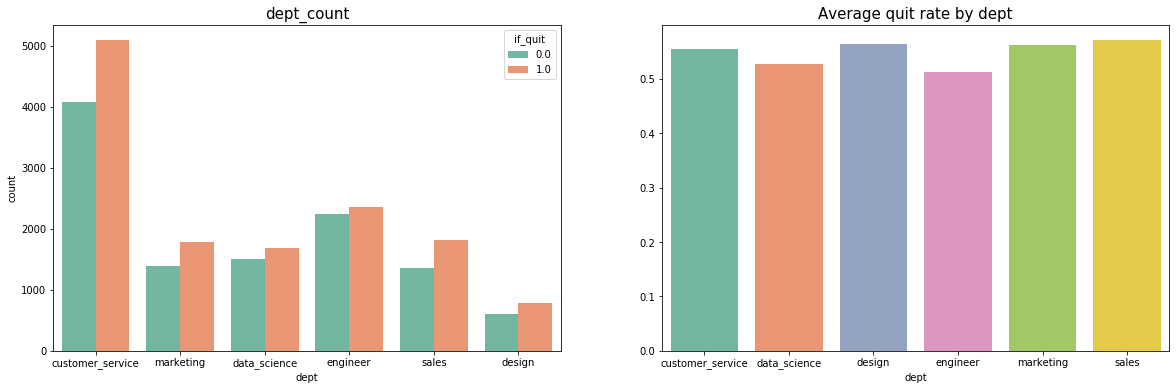

In [23]:
by_dept = data.groupby('dept')['if_quit'].mean()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.countplot(x = 'dept', data = data, hue = 'if_quit', palette = 'Set2', ax = ax[0])
ax[0].set_title('dept_count', fontsize = 15)
# ax[0].set_yscale('log')    
# total count of company 11 and 12 are smaller than other company, if not log y, they won't appear on the graph
sns.barplot(x = by_dept.index, y = by_dept.values, palette='Set2', ax = ax[1])
ax[1].set_title('Average quit rate by dept', fontsize = 15)
plt.show()

### seniority

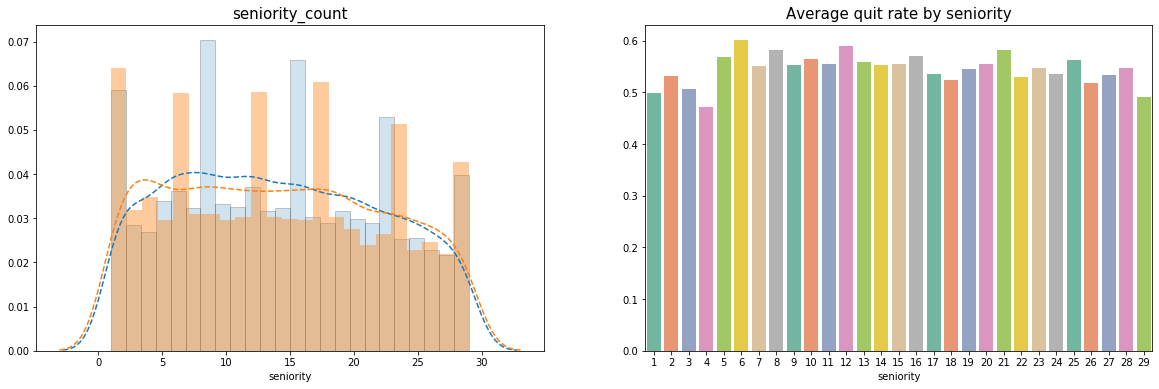

In [29]:
by_seniority = data.groupby('seniority')['if_quit'].mean()
hist_kws = {'histtype': 'bar','edgecolor': 'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(data[data['if_quit'] == 1]['seniority'], norm_hist=True, 
             ax = ax[0], label = 'quit', hist_kws=hist_kws,
             kde=True, kde_kws={'linestyle': '--'})
sns.distplot(data[data['if_quit'] == 0]['seniority'], norm_hist=True, 
             ax = ax[0], label = 'not quit', 
             kde=True, kde_kws={'linestyle': '--'})
ax[0].set_title('seniority_count', fontsize = 15)
# ax[0].set_yscale('log')    
# total count of company 11 and 12 are smaller than other company, if not log y, they won't appear on the graph
sns.barplot(x = by_seniority.index, y = by_seniority.values, palette='Set2', ax = ax[1])
ax[1].set_title('Average quit rate by seniority', fontsize = 15)
plt.show()

seniority doesn't seem to be related to whether an employee will quit or not

### salary

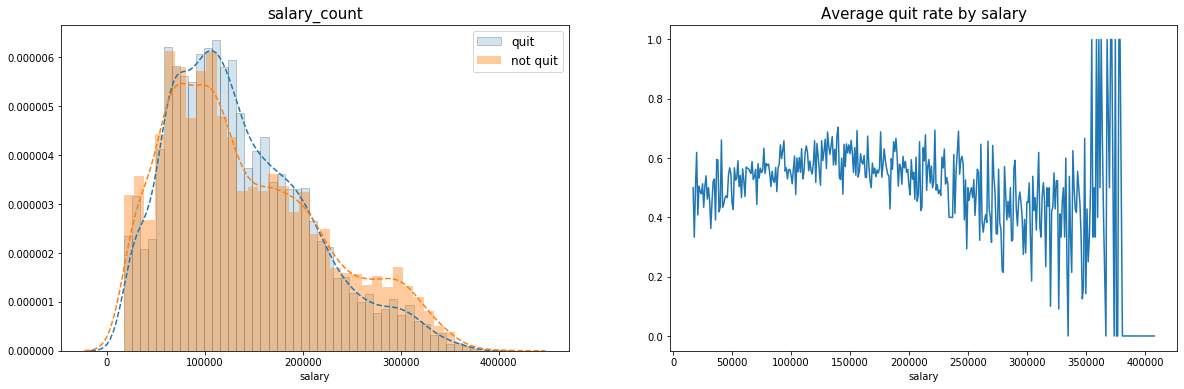

In [102]:
by_salary = data.groupby('salary')['if_quit'].mean()
hist_kws = {'histtype': 'bar','edgecolor': 'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(data[data['if_quit'] == 1]['salary'], norm_hist=True, 
             ax = ax[0], label = 'quit', hist_kws=hist_kws,
             kde=True, kde_kws={'linestyle': '--'})
sns.distplot(data[data['if_quit'] == 0]['salary'], norm_hist=True, 
             ax = ax[0], label = 'not quit', 
             kde=True, kde_kws={'linestyle': '--'})
ax[0].legend(loc = 'best', fontsize = 12)
ax[0].set_title('salary_count', fontsize = 15)
# ax[0].set_yscale('log')    
# total count of company 11 and 12 are smaller than other company, if not log y, they won't appear on the graph
sns.lineplot(x = by_salary.index, y = by_salary.values, palette='Set2', ax = ax[1])
ax[1].set_title('Average quit rate by salary', fontsize = 15)
plt.show()

More people tend to quit when their salary is around （7k-12k）
The distribution of salary is skewed, when salary increases, the average quit rate fluctuates greatly

## Find the characteristics of the people who quit early

Looking at the histogram of employment_length, it looks like we could **define early quitters as those people who quit within 1 yr or so**.\
Let’s create two classes of users : quit within 13 months or not (if they haven’t been in the current
company for at least 13 months, we remove them).

In [85]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,if_quit,work_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1.0,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1.0,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0.0,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1.0,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1.0,1040.0


In [97]:
new_data = data[(data['work_days'] > 390) | (data['work_days'].isna())]   
# remove those work less than 13 months
new_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,if_quit,work_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1.0,585.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0.0,NaN
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1.0,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,1.0,578.0
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaT,0.0,NaN


# Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [112]:
X = new_data.loc[:,['company_id','dept','seniority','salary']]
y = new_data.loc[:, 'if_quit']

In [113]:
X = pd.get_dummies(X)

In [114]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3)

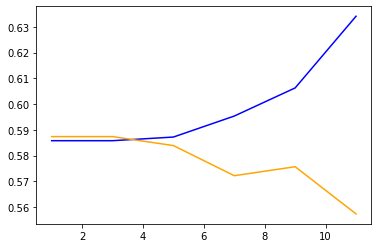

In [129]:
# choose the best max_depth
train_acc = []
test_acc = []
for i in range(1, 12, 2):
    dtc = DecisionTreeClassifier(max_depth=i,
                                random_state=42)
    dtc.fit(Xtrain, Ytrain)
    train_acc.append(dtc.score(Xtrain, Ytrain))
    test_acc.append(dtc.score(Xtest, Ytest))

plt.plot(range(1, 12, 2), train_acc, c = 'blue')
plt.plot(range(1, 12, 2), test_acc, c = 'orange')
plt.show()

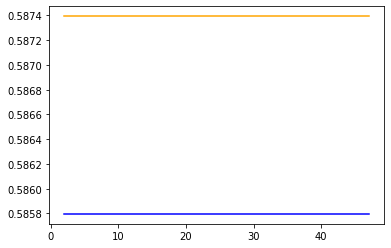

In [137]:
# choose the best min_sample_split
train_acc = []
test_acc = []
for i in range(2,50,5):
    dtc = DecisionTreeClassifier(max_depth=3,
                                 min_samples_split=i,
                                random_state=42)
    dtc.fit(Xtrain, Ytrain)
    train_acc.append(dtc.score(Xtrain, Ytrain))
    test_acc.append(dtc.score(Xtest, Ytest))

plt.plot(range(2,50,5), train_acc, c = 'blue')
plt.plot(range(2,50,5), test_acc, c = 'orange')
plt.show()

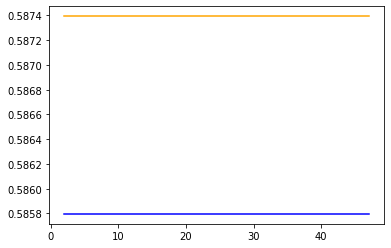

In [138]:
# choose the best min_sample_leaf
train_acc = []
test_acc = []
for i in range(2,50,5):
    dtc = DecisionTreeClassifier(max_depth=3,
                                 min_samples_leaf=i,
                                random_state=42)
    dtc.fit(Xtrain, Ytrain)
    train_acc.append(dtc.score(Xtrain, Ytrain))
    test_acc.append(dtc.score(Xtest, Ytest))

plt.plot(range(2,50,5), train_acc, c = 'blue')
plt.plot(range(2,50,5), test_acc, c = 'orange')
plt.show()

In [164]:
dtc_best = DecisionTreeClassifier(max_depth=3,
                                random_state=42).fit(Xtrain, Ytrain)

In [165]:
feature_names = Xtrain.columns
for i in range(len(feature_names)):
    print('{0:<25s} : {1: .4f}'.format(feature_names[i], dtc_best.feature_importances_[i]))

company_id                :  0.0000
seniority                 :  0.0642
salary                    :  0.9358
dept_customer_service     :  0.0000
dept_data_science         :  0.0000
dept_design               :  0.0000
dept_engineer             :  0.0000
dept_marketing            :  0.0000
dept_sales                :  0.0000


The most important feature is salary!

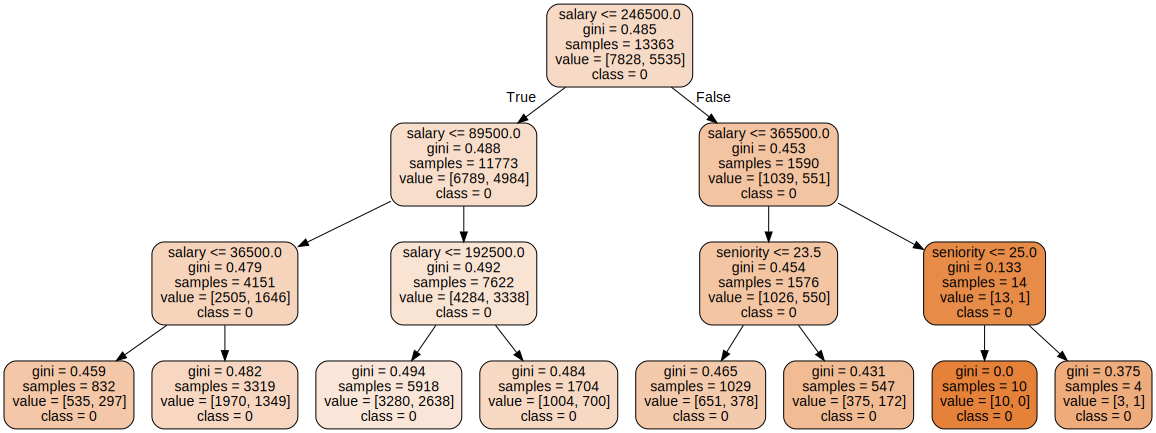

In [206]:
# Visualize Decision Tree
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dtc_best, 
                                feature_names=feature_names, 
                                class_names=['0', '1'],
                                filled=True, 
                                rounded=True)
graph = graphviz.Source(dot_data)
graph

People who make a lot of money and very little are not likely to quit

By plotting the proportion of early quitter by salary percentile, this becomes quite clear:

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


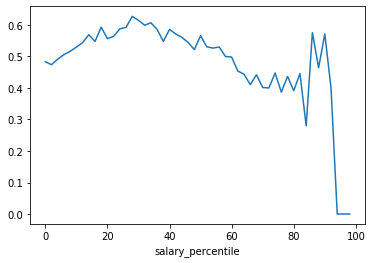

In [207]:
data['salary_percentile'] = pd.cut(data['salary'], 50, labels=np.arange(0,100,2))
by_salary_percentile = data.groupby('salary_percentile')['if_quit'].mean()
sns.lineplot(x = by_salary_percentile.index, y = by_salary_percentile.values.flatten())
plt.show()

跟答案有所出入

# Conclusion

1. Given how important is salary, I would definitely love to have as a variable the **salary the employee
who quit was offered in the next job**. Otherwise, things like: **promotions or raises** received during
the employee tenure would be interesting.

2. The major findings are that employees **quit at year anniversaries or at the beginning of the year**.
Both cases make sense. Even if you don’t like your current job, you often stay for 1 yr before
quitting + <u>you often get stocks after 1 yr</u> so it makes sense to wait. Also, <u>the beginning of the year is well known to be the best time to change job</u>: companies are hiring more and you often want to <u>stay until end of Dec to get the calendar year bonus</u>.

3. **Employees with low and high salaries are less likely to quit**. Probably because employees with high
salaries are happy there and employees with low salaries <u>are not that marketable</u>, so they have a
hard time finding a new job.